In [19]:
import pandas as pd
from langdetect import detect
from mtranslate import translate
from requests.exceptions import ReadTimeout, RequestException

data_frame = pd.read_table("./cyber_attacks/cyber.csv", delimiter=',')

IDS
IDS (Intrusion Detection System) o sistema de detección de intrusiones: es una aplicación usada para detectar accesos no autorizados a un ordenador o a una red, es decir, son sistemas que monitorizan el tráfico entrante y lo cotejan con una base de datos actualizada de firmas de ataque conocidas. Ante cualquier actividad sospechosa, emiten una alerta a los administradores del sistema quienes han de tomar las medidas oportunas. Estos accesos pueden ser ataques esporádicos realizados por usuarios malintencionados o repetidos cada cierto tiempo, lanzados con herramientas automáticas. Estos sistemas sólo detectan los accesos sospechosos emitiendo alertas anticipatorias de posibles intrusiones, pero no tratan de mitigar la intrusión. Su actuación es reactiva.

IPS
IPS (Intrusion Prevention System) o sistema de prevención de intrusiones: es un software que se utiliza para proteger a los sistemas de ataques e intrusiones. Su actuación es preventiva. Estos sistemas llevan a cabo un análisis en tiempo real de las conexiones y los protocolos para determinar si se está produciendo o se va a producir un incidente, identificando ataques según patrones, anomalías o comportamientos sospechosos y permitiendo el control de acceso a la red, implementando políticas que se basan en el contenido del tráfico monitorizado, es decir, el IPS además de lanzar alarmas, puede descartar paquetes y desconectar conexiones.

Muchos proveedores ofrecen productos mixtos, llamándolos IPS/IDS, integrándose frecuentemente con cortafuegos y UTM (en inglés Unified Threat Management o Gestión Unificada de Amenazas) que controlan el acceso en función de reglas sobre protocolos y sobre el destino u origen del tráfico.

SIEM
SIEM (Security Information and Event Management) o sistema de gestión de eventos e información de seguridad: es una solución híbrida centralizada que engloba la gestión de información de seguridad (Security Information Management) y la gestión de eventos (Security Event Manager). La tecnología SIEM proporciona un análisis en tiempo real de las alertas de seguridad generadas por los distintos dispositivos hardware y software de la red. Recoge los registros de actividad (logs) de los distintos sistemas, los relaciona y detecta eventos de seguridad, es decir, actividades sospechosas o inesperadas que pueden suponer el inicio de un incidente, descartando los resultados anómalos, también conocidos como falsos positivos y generando respuestas acordes en base a los informes y evaluaciones que registra, es decir, es una herramienta en la que se centraliza la información y se integra con otras herramientas de detección de amenazas.

In [2]:
df = data_frame
df.sample()

Timestamp Source IP Address Destination IP Address  \
12865  2021-08-21 00:03:00    50.251.231.195         170.111.59.252   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
12865        28619             17697      TCP           1009     Control   

      Traffic Type                                       Payload Data  ...  \
12865         HTTP  Praesentium error voluptatem tempore iure.\nTo...  ...   

      Action Taken  Severity Level User Information  \
12865      Ignored            High     Yakshit Dada   

                                      Device Information Network Segment  \
12865  Mozilla/5.0 (Linux; Android 4.4.3) AppleWebKit...       Segment B   

              Geo-location Data Proxy Information Firewall Logs  \
12865  Bangalore, Uttar Pradesh               NaN           NaN   

      IDS/IPS Alerts Log Source  
12865     Alert Data   Firewall  

[1 rows x 25 columns]

In [3]:
# Crear un DataFrame con columnas en español

df_esp = pd.DataFrame(df)
# Crear un diccionario con los nuevos nombres de las columnas
dict_esp = {
    "Timestamp": "Fecha_hora",
    "Source IP Address":"IP origen",
    "Destination IP Address":"IP destino",
    "Source Port":"Puerto_origen",
    "Destination Port":"Puerto_destino",
    "Protocol":"Protocolo",
    "Packet Length":"Longitud_paquete",
    "Packet Type": "Tipo_paquete",
    "Traffic Type":"Tipo_tráfico",
    "Payload Data": "Datos_carga_util",
    "Malware Indicators": "Indicadores_malware",
    "Anomaly Scores": "Puntuaciones_anomalías",
    "Alerts/Warnings": "Alertas_advertencias",
    "Attack Type": "Tipo_ataque",
    "Attack Signature": "Firma_ataque",
    "Action Taken": "respuesta_tomada",
    "Severity Level": "Nivel_severidad",
    "User Information": "Informacion_usuario",
    "Device Information": "Informacion_dispositivo",
    "Network Segment": "Segmento_red",
    "Geo-location Data": "Datos_geolocalización",
    "Proxy Information": "Informacion_proxy",
    "Firewall Logs": "Registros_cortafuegos",
    "IDS/IPS Alerts": "Alertas IDS(sist_detec_intrusos/IPS(sist_preve_intrusos)",
    "Log Source":"Fuente_registro"
    }
# Aplicar el cambio de nombres usando el método rename
df.rename(columns=dict_esp, inplace=True)

#imprrimir



In [20]:


# Crear un DataFrame de ejemplo
df_esp = pd.DataFrame(df)
# Crear un diccionario con los nuevos nombres de las columnas
dict_esp = {
    "Timestamp": "Fecha_hora",
    "Source IP Address":"IP origen",
    "Destination IP Address":"IP destino",
    "Source Port":"Puerto_origen",
    "Destination Port":"Puerto_destino",
    "Protocol":"Protocolo",
    "Packet Length":"Longitud_paquete",
    "Packet Type": "Tipo_paquete",
    "Traffic Type":"Tipo_tráfico",
    "Payload Data": "Datos_carga_util",
    "Malware Indicators": "Indicadores_malware",
    "Anomaly Scores": "Puntuaciones_anomalías",
    "Alerts/Warnings": "Alertas_advertencias",
    "Attack Type": "Tipo_ataque",
    "Attack Signature": "Firma_ataque",
    "Action Taken": "respuesta_tomada",
    "Severity Level": "Nivel_severidad",
    "User Information": "Informacion_usuario",
    "Device Information": "Informacion_dispositivo",
    "Network Segment": "Segmento_red",
    "Geo-location Data": "Datos_geolocalización",
    "Proxy Information": "Informacion_proxy",
    "Firewall Logs": "Registros_cortafuegos",
    "IDS/IPS Alerts": "Alertas IDS(sist_detec_intrusos/IPS(sist_preve_intrusos)",
    "Log Source":"Fuente_registro"
    }
# Aplicar el cambio de nombres usando el método rename
df.rename(columns=dict_esp, inplace=True)


def traducir_columna(df, columna, idioma_destino):
    # Definir la función para traducir si es necesario
    def traducir(texto):
        try:
            # Convertir el texto a cadena si no es de tipo str
            texto = str(texto)

            # Verificar si el texto contiene solo números
            if texto.isdigit():
                return texto  # No traducir números, devolver el texto original

            # Traducir solo si el idioma detectado no es el idioma de destino
            idioma_detectado = detect(texto)
            if idioma_detectado != idioma_destino:
                # Intentar la traducción y manejar el error específico
                try:
                    traduccion = translate(texto, idioma_destino)
                    if traduccion:
                        return traduccion
                    else:
                        print(f"La traducción para el texto '{texto}' es None.")
                        return texto
                except Exception as e:
                    print(f"Error durante la traducción: {e}. No se puede traducir el texto.")
                    return texto
            else:
                return texto

        except Exception as e:
            print(f"Error durante la traducción: {e}")
            return texto

    # Aplicar la función de traducción a la columna
    df[columna + '_traducido'] = df[columna].apply(traducir)
    return df

# Ejemplo de uso
df = df_esp
columna = "Datos_carga_util"
idioma_destino = 'es'
df_traducido = traducir_columna(df, columna, idioma_destino)

# Muestra el DataFrame con la columna detectada y, si es necesario, traducida
print(df_traducido)


In [ ]:
df_traducido

Fecha_hora       IP origen       IP destino  Puerto_origen  \
0      2023-05-30 06:33:58   103.216.15.12     84.9.164.252          31225   
1      2020-08-26 07:08:30  78.199.217.198   66.191.137.154          17245   
2      2022-11-13 08:23:25    63.79.210.48    198.219.82.17          16811   
3      2023-07-02 10:38:46   163.42.196.10  101.228.192.255          20018   
4      2023-07-16 13:11:07   71.166.185.76  189.243.174.238           6131   
...                    ...             ...              ...            ...   
39995  2023-05-26 14:08:42    26.36.109.26   121.100.75.240          31005   
39996  2023-03-27 00:38:27    17.21.163.81   196.108.134.78           2553   
39997  2022-03-31 01:45:49   162.35.217.57      98.107.0.15          22505   
39998  2023-09-22 18:32:38  208.72.233.205   173.79.112.252          20013   
39999  2023-10-10 11:59:52   14.102.21.108     109.198.45.7          50137   

       Puerto_destino Protocolo  Longitud_paquete Tipo_paquete Tipo_tráfico  \
0               17616      ICMP               503         Data         HTTP   
1               48166      ICMP              1174         Data         HTTP   
2               53600       UDP               306      Control         HTTP   
3               32534       UDP               385         Data         HTTP   
4               26646       TCP              1462         Data          DNS   
...               ...       ...               ...          ...          ...   
39995            6764       UDP              1428      Control         HTTP   
39996           28091       UDP              1184      Control         HTTP   
39997           25152       UDP              1043         Data          DNS   
39998            2703       UDP               483         Data          FTP   
39999           55575      ICMP              1175      Control         HTTP   

                                        Datos_carga_util  ... Nivel_severidad  \
0      Qui natus odio asperiores nam. Optio nobis ius...  ...             Low   
1      Aperiam quos modi officiis veritatis rem. Omni...  ...             Low   
2      Perferendis sapiente vitae soluta. Hic delectu...  ...             Low   
3      Totam maxime beatae expedita explicabo porro l...  ...          Medium   
4      Odit nesciunt dolorem nisi iste iusto. Animi v...  ...             Low   
...                                                  ...  ...             ...   
39995  Quibusdam ullam consequatur consequuntur accus...  ...          Medium   
39996  Quaerat neque esse. Animi expedita natus commo...  ...            High   
39997  Enim at aspernatur illum. Saepe numquam eligen...  ...             Low   
39998  Officiis dolorem sed harum provident earum dis...  ...             Low   
39999  Eligendi omnis voluptate nihil voluptatibus do...  ...          Medium   

       Informacion_usuario                            Informacion_dispositivo  \
0            Reyansh Dugal  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...   
1               Sumer Rana  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...   
2             Himmat Karpe  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3               Fateh Kibe  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...   
4             Dhanush Chad  Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...   
...                    ...                                                ...   
39995          Adira Madan  Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...   
39996            Rati Dara  Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....   
39997         Samiha Joshi  Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...   
39998        Rasha Chauhan  Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....   
39999          Zaina Kumar  Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...   

      Segmento_red          Datos_geolocalización Informacion_proxy  \
0        Segment A             Jamshedpur, Sikkim      150.9.97.135   
1        Segment B             Bilaspur, N

In [ ]:
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Fecha_hora                                                40000 non-null  object 
 1   IP origen                                                 40000 non-null  object 
 2   IP destino                                                40000 non-null  object 
 3   Puerto_origen                                             40000 non-null  int64  
 4   Puerto_destino                                            40000 non-null  int64  
 5   Protocolo                                                 40000 non-null  object 
 6   Longitud_paquete                                          40000 non-null  int64  
 7   Tipo_paquete                                              40000 non-null  object 
 8   Tipo_tráfico    

In [ ]:
df_esp.value_counts(normalize=True)

Fecha_hora           IP origen        IP destino       Puerto_origen  Puerto_destino  Protocolo  Longitud_paquete  Tipo_paquete  Tipo_tráfico  Datos_carga_util                                                                                                                                                                                Indicadores_malware  Puntuaciones_anomalías  Alertas_advertencias  Tipo_ataque  Firma_ataque     respuesta_tomada  Nivel_severidad  Informacion_usuario  Informacion_dispositivo                                                                                                          Segmento_red  Datos_geolocalización      Informacion_proxy  Registros_cortafuegos  Alertas IDS(sist_detec_intrusos/IPS(sist_preve_intrusos)  Fuente_registro
2020-01-01 00:43:27  159.63.40.232    84.35.86.112     30053          56285           UDP        1428              Data          DNS           Autem officiis officia sapiente adipisci. Corporis qui quasi debitis tempora recusa

array([[<Axes: title={'center': 'Source Port'}>,
        <Axes: title={'center': 'Destination Port'}>],
       [<Axes: title={'center': 'Packet Length'}>,
        <Axes: title={'center': 'Anomaly Scores'}>]], dtype=object)

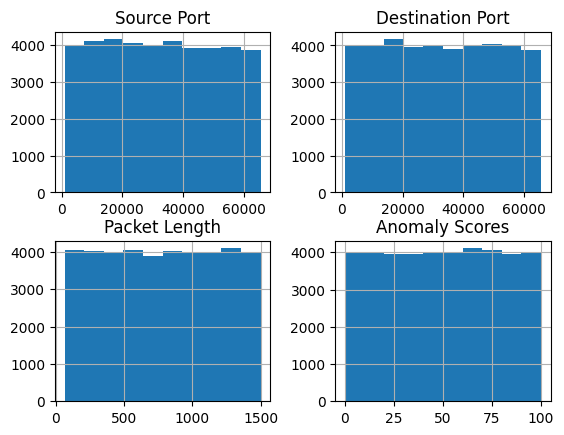

In [ ]:
df.hist()

In [ ]:
df.describe()

Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000

In [ ]:
print(len(df["Geo-location Data"].value_counts()))

8723


In [ ]:

#ydataprofilig
df_y= df.copy()

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(df_y) # un monton d ecampos en correlation nos da el valor de correlacion en referencia al coeficiente correlacional de pyrson  que esta etre -1 y 1( -0,7 valor alto negativo, 0,75 alta postiova, 0,018,
#, es uan correelacion muy pequeñña pq esta cerca del 0) # en colores mas intenso el color mas correlacion y menos color intesidad menor correlacion

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


In [ ]:
# libreria D-Tale# ademas de ver los datos podemos editar los datos
import dtale


In [ ]:
dtale.show(df_y)

In [ ]:
#libreria SwwetViz
import sweetviz as sv



In [ ]:
# me hace el analisis
# el campo asssciantons, nos aporta graficos de correlaciones entre las variavles. los colores y la forma : un circulo ocuadrado si la variable es categorica o numerica. El tamañao de la figura la fuerza de la relacion
#el color al valor del coeficiente y la intesidad si azul es positivo y rojo es negativo

In [ ]:
report = sv.analyze(df_y)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [ ]:
report.show_html("informe_ciber_sweetviz.html")

Report informe_ciber_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#libreria missingno; nos proporciona una serie de visulaciones sobre la presencia y distribucion de datos falatntes o missing, es  especificca para valors faltantes.
import missingno as msno


<Axes: >

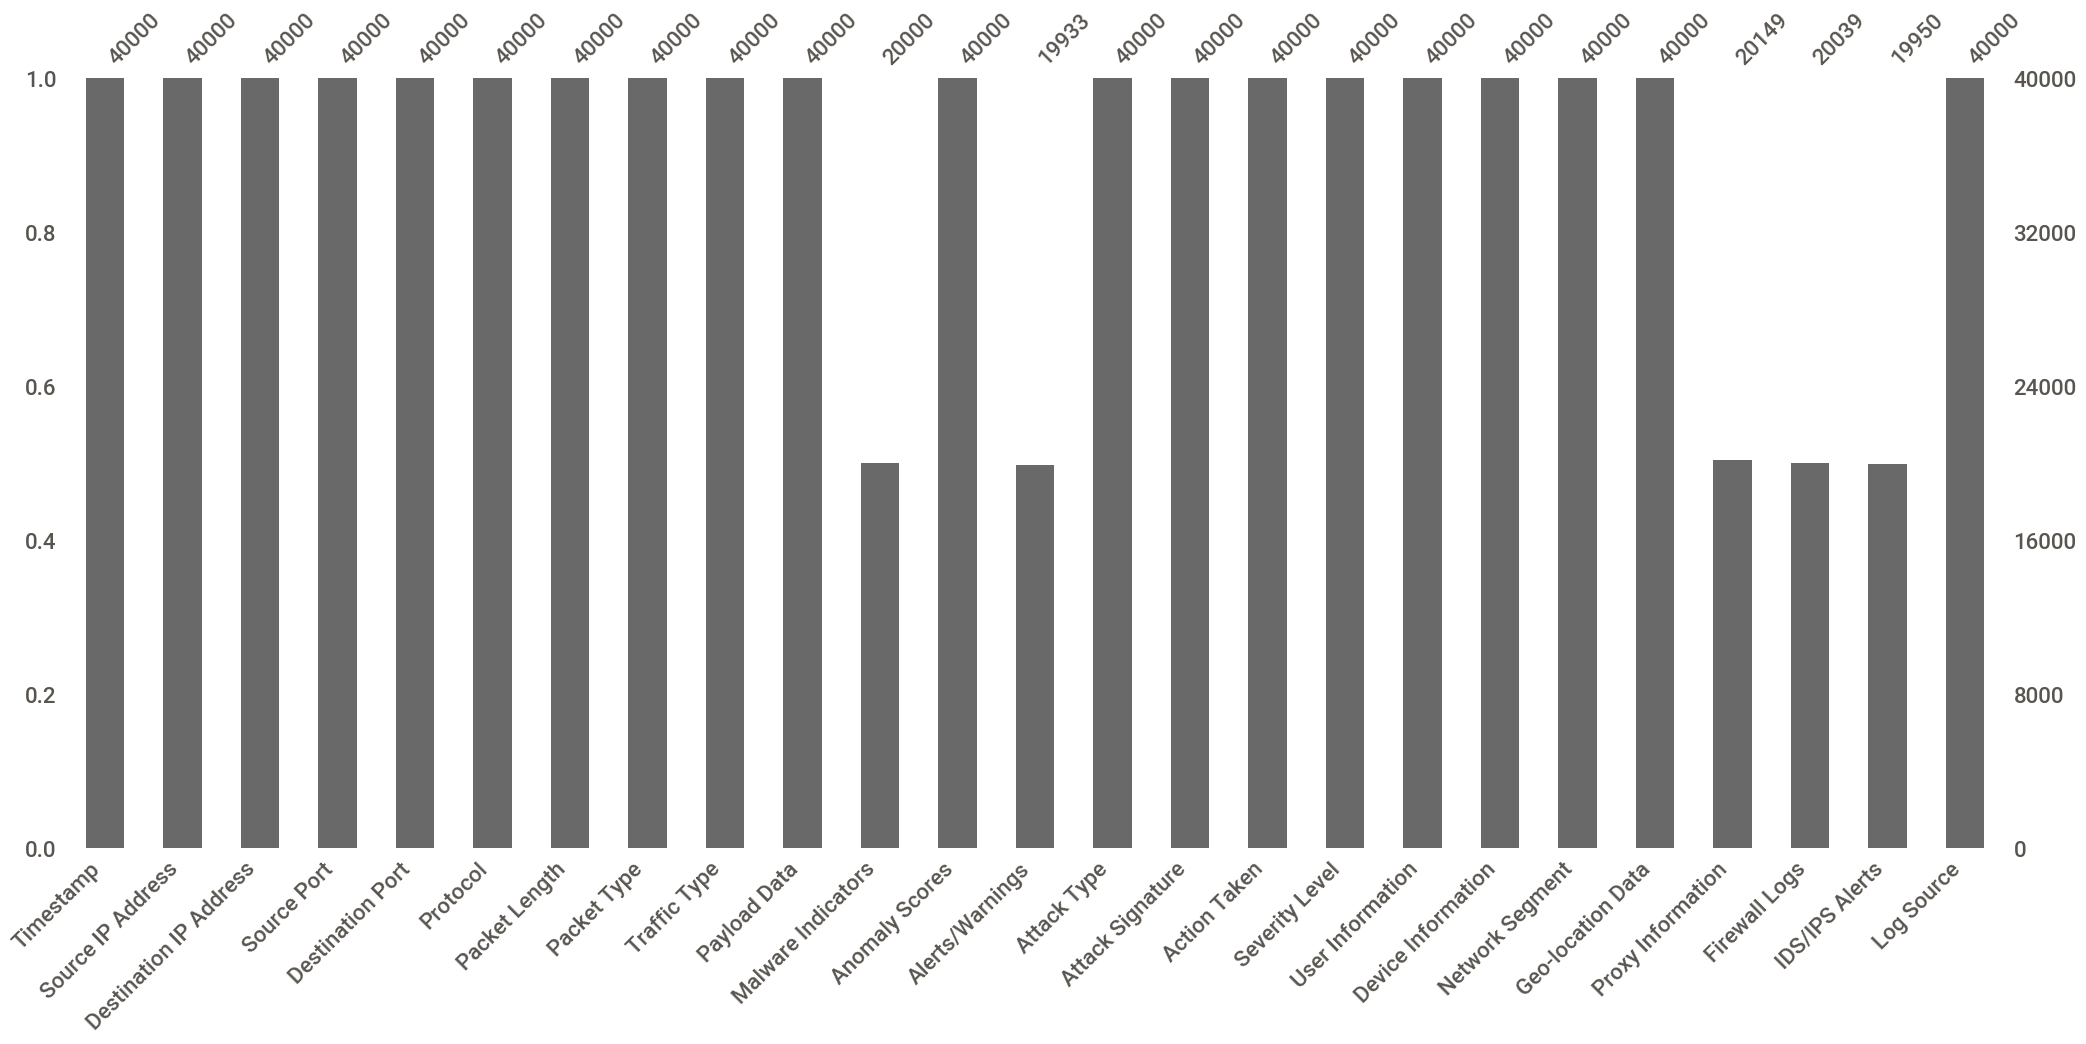

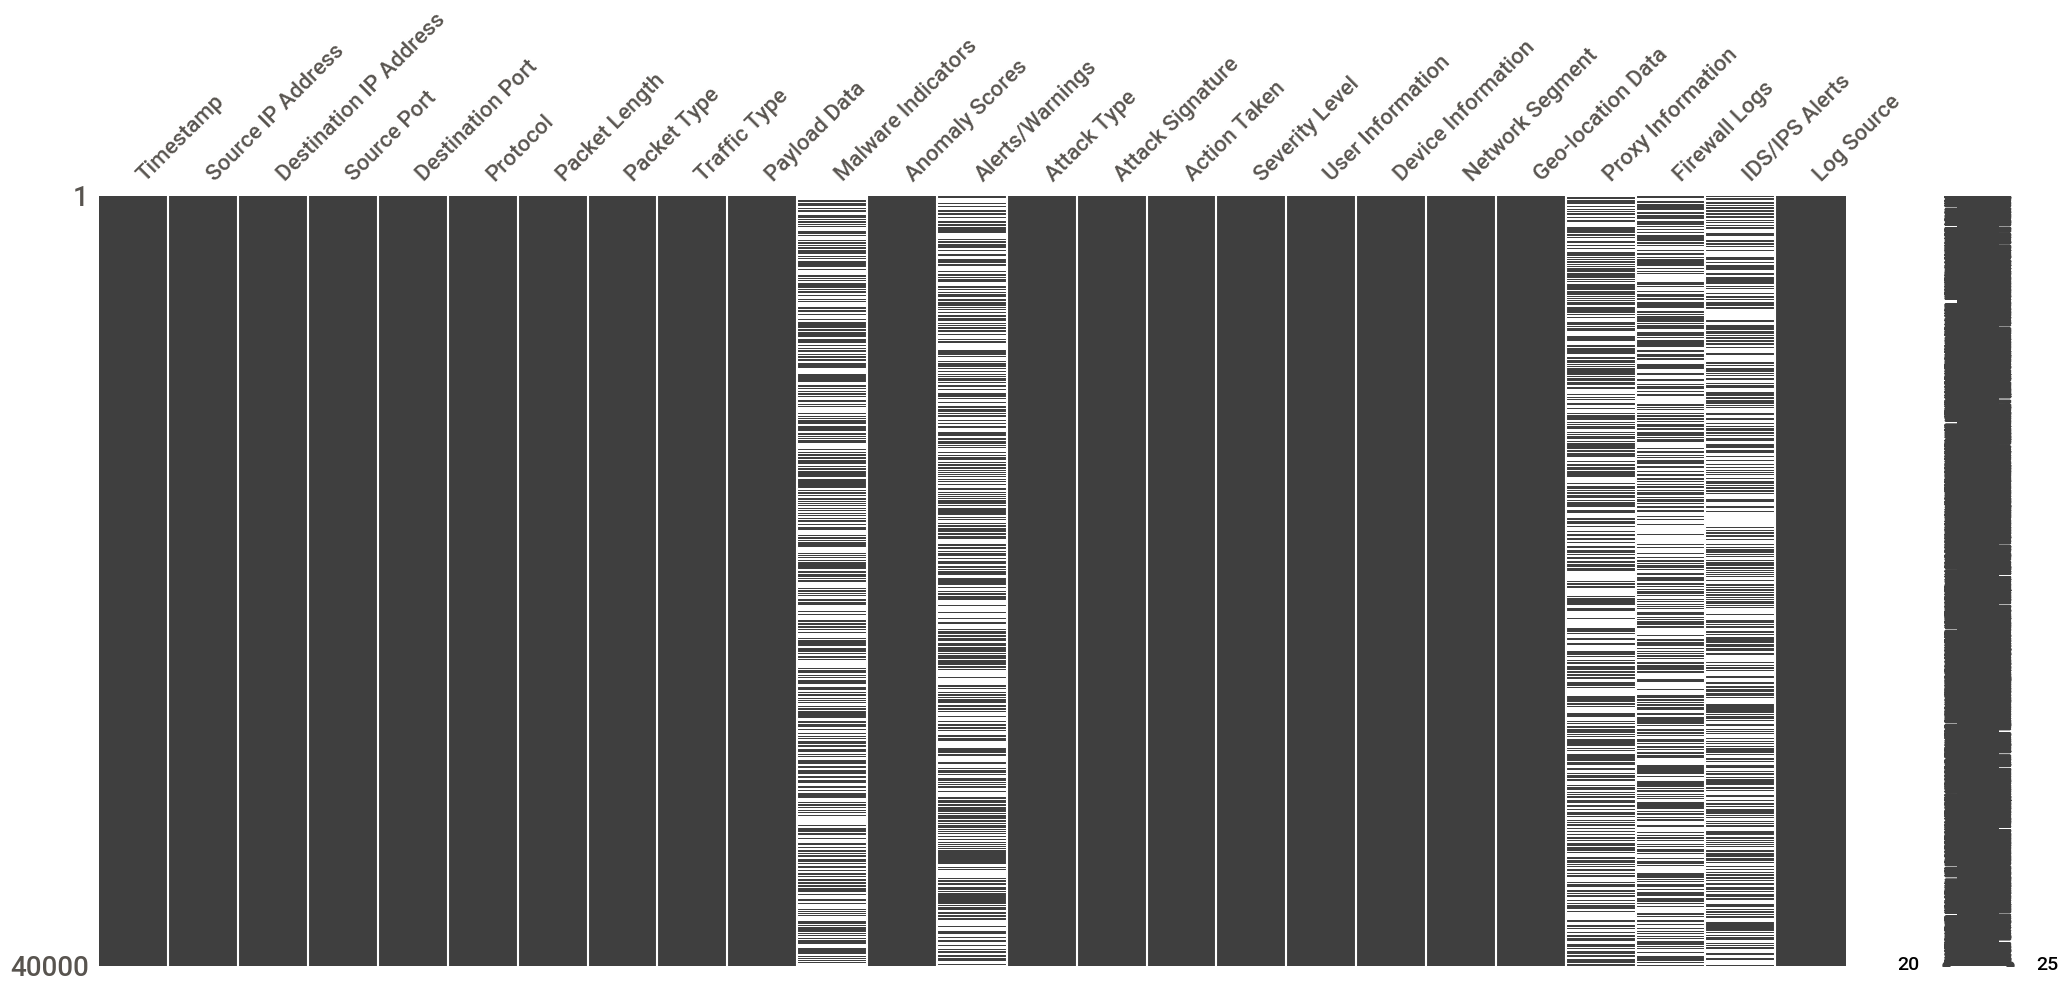

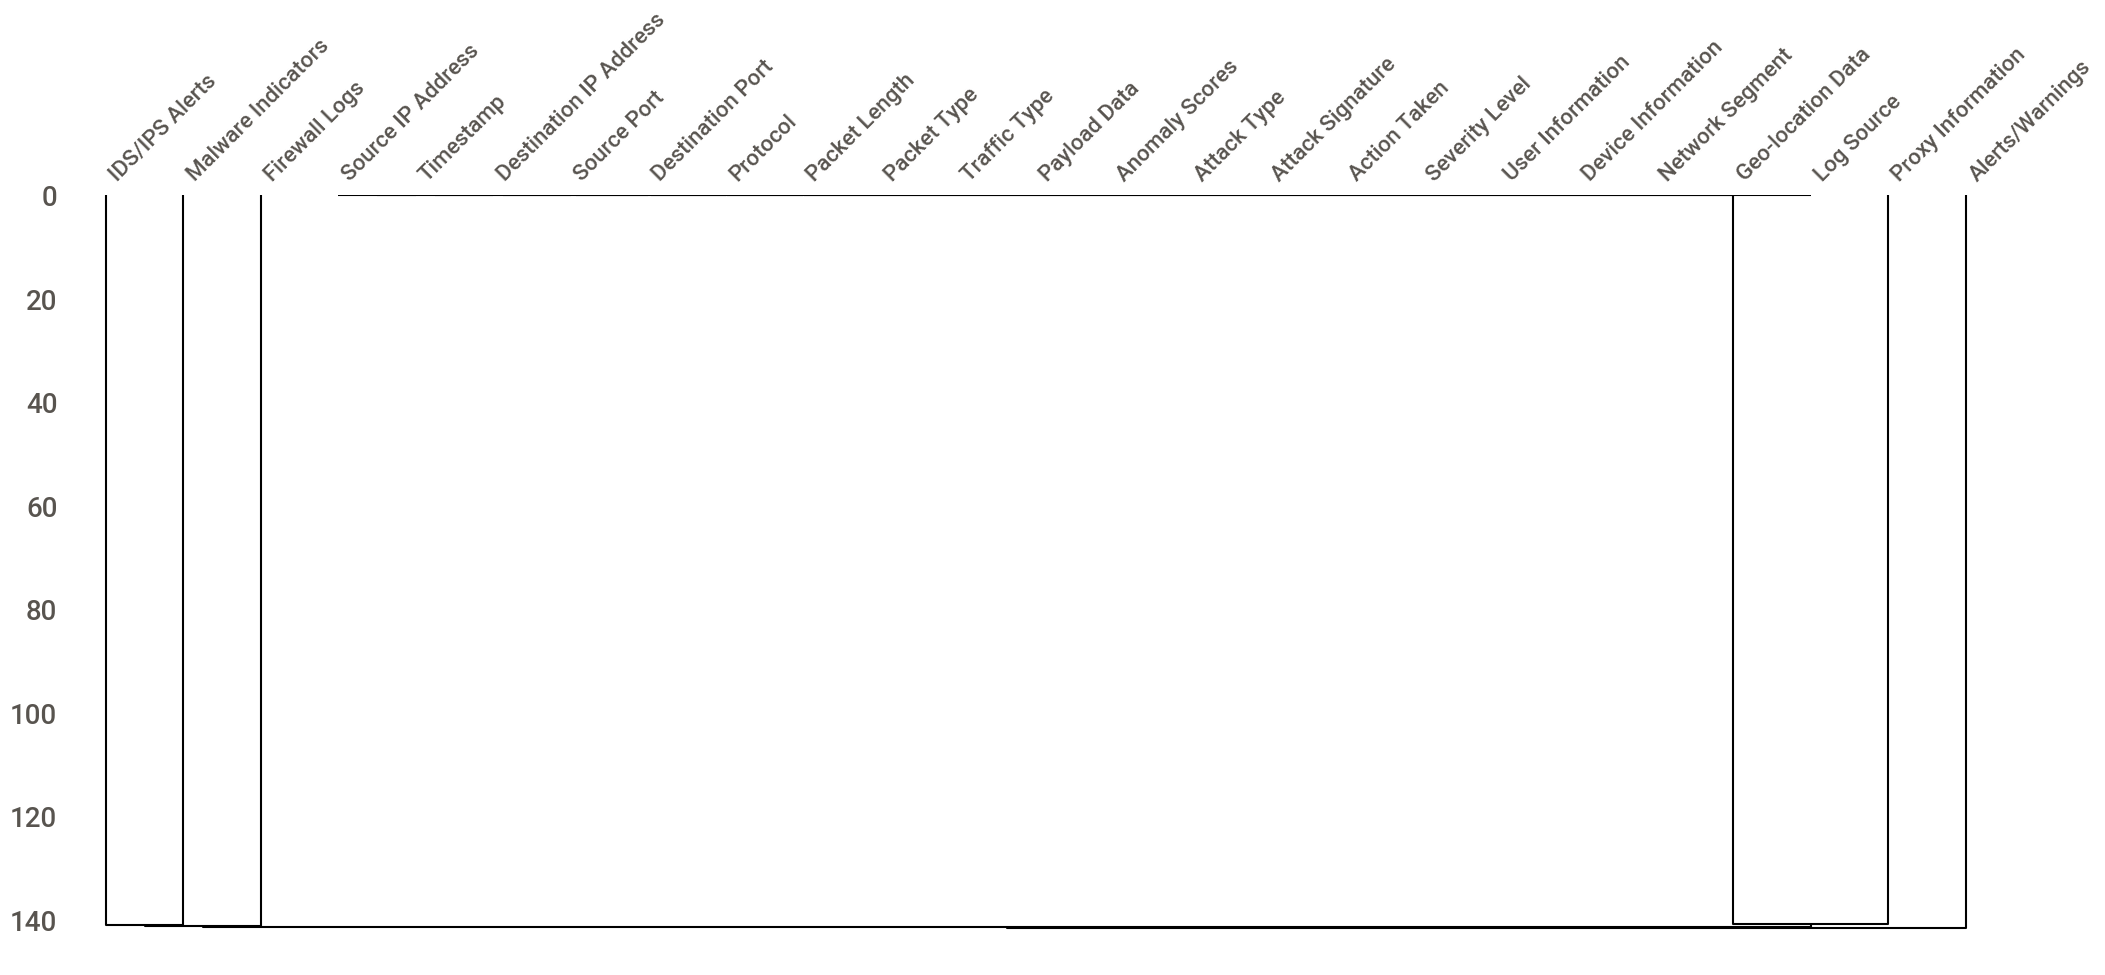

In [ ]:
msno.bar(df_y)# si tiene valores faltantes o no
msno.matrix(df_y)# nos dice donde se producen las NaN
msno.dendrogram(df_y)# o msno.heatmap(df) nos dice que tan correlacionados estan los valores faltantes



In [ ]:
# LIBRERIA SKETCH
# esta libreria es muy nueva de febredro de 20023, aprovecha la IA para hacer cosas con los dataset (df pandas) con un conjunto de preguntas en lenguiaje natural  de los que queremos obytener y me devuelve la respuesta
# hasta si le pedimos el codigo para hacer algo nos lo apporta. O me le hago la pregunta y me da el resultado o le pido el codigo para hacer la pregunta y me lo devuelves


In [ ]:
import sketch

In [ ]:
# el metodo .ask; es para hacerle preguntas usando lenguaje natural ( NLP) en ingles

df_y.sketch.ask("What are the max values of each numerical column")

NameError: name 'df_y' is not defined

In [ ]:
# como mi dataframe tiene un mayor numero de columnas que las predetermiadas por sketch, vamos a aumnmetarle el nuemro de columnas:
import os

# Establece la variable de entorno SKETCH_MAX_COLUMNS a un valor mayor
os.environ["SKETCH_MAX_COLUMNS"] = "30"  # Puedes ajustar este valor según tus necesidades

In [ ]:
df_y.sketch.ask("What are the top 3 countries with the highest number of attacks, and the top 3 countries of origin for the attacks?")

In [ ]:
df_y.sketch.ask("What are the IPs that are most frequently repeated in the attacks and their origin?")

In [ ]:
df_y.sketch.ask("Geolocate the IPs from the attacks and provide me with a detailed report for each of the IPs.")

In [ ]:
df_y.sketch.ask(" which servic dp you prefer to use:  MaxMind or IP2Location ")

In [ ]:
df_y.sketch.ask( "which servic dp you prefer to use:  OpenStreetMap, GeoNames, and Nominatim ")

In [ ]:
from IP2Location import IP2Location

df_y.sketch.ask("Geolocate the IPs from the attacks and provide me with a detailed report for each of the IPs. you can use IP2location")

In [ ]:
# PROGRAMA GEOLOCALIZAR IPS DE UN DF
import pandas as pd
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopy.exc import GeocoderTimedOut
import time

# Read in the dataframe
df_data = pd.read_csv('./cyber_attacks/df_ciber_modificado.csv')

# Crea una instancia del geocodificador (utilizando Nominatim en este caso).
geolocator = Nominatim(user_agent="my_geocoder")

# Crea una lista de las direcciones IP de origen a partir del marco de datos
source_ips = df_data['ip'].tolist()

# Crea una lista vacía para almacenar las coordenadas de cada dirección IP de origen
coordinates = []

# Función de reintento para la geocodificación con un máximo de 3 intentos.
def geocode_with_retry(location):
    attempts = 0
    while attempts < 3:
        try:
            return geolocator.geocode(location)
        except (GeocoderTimedOut, TimeoutError) as e:
            print(f"Error geocoding {location}: {e}")
            attempts += 1
            time.sleep(1)  #Agrega una breve pausa antes de volver a intentarlo
    return None

# Itera a través de la lista de direcciones IP de origen y obtén las coordenadas para cada una.
for ip in source_ips:
    try:
        location = geolocator.geocode(ip, timeout=10)  # Ajusta el tiempo de espera según tus necesidades)
        if location:
            coordinates.append((location.longitude, location.latitude))
        else:
            coordinates.append((None, None))# si la ubicacion no se encuentra
    except TimeoutError:
        # Manejar excepciones, por ejemplo, añadir un retraso y reintento
        time.sleep(1)  # Espera 1 segundo antes de volver a intentar
        try:
            location = geolocator.geocode(ip, timeout=10)
            if location:
                coordinates.append((location.longitude, location.latitude))
            else:
                coordinates.append((None, None))
        except TimeoutError:
            coordinates.append((None, None))  # Si aún hay un error, añade None

# Crea un GeoDataFrame a partir de la lista de coordenadas.
geometry = [Point(xy) for xy in coordinates]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Representa el GeoDataFrame en un mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.7)
plt.title("Source IP Addresses")
plt.show()

KeyError: 'ip'

In [ ]:
df_data = pd.read_csv("E:\Cursos\BC_Data_Science\Repositorio\proyecto EDA\data_ip_pais.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Cursos\\BC_Data_Science\\Repositorio\\proyecto EDA\\data_ip_pais.csv'

In [ ]:
df_y.sketch.ask("Tell me interesting questions you could ask me about this dataframe with the data provided in all the columns."



df_esp. head(1)

)